<a href="https://colab.research.google.com/github/UiinKim/Crawling/blob/main/2%EA%B0%95_3_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91_%EB%B0%A9%EB%B2%95%EB%A1%A0_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84_%ED%86%B5%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : **TBD** TBU (운영진 작성 영역)

### **Objectives**

1. 실습 개요
  - 웹 크롤링 실습
  - 공공데이터 API 실습
  - JSON, CSV, XML 실습
2. 실습 진행 목적 및 배경
  -  본 실습은 정적 페이지부터 동적 페이지까지의 웹 크롤링 실습과 다양한 라이브러리 활용법들을 배우며, 공공기관이 제공하는 API를 사용하여 구조화된 데이터를 요청하고 응답받는 과정을 익힙니다. 서로 다른 데이터 포멧 (JSON, CSV, XML)의 구조와 특징을 이해하고 데이터 변환 및 저장 방법을 학습하여 유연하게 작업할 수 있도록 합니다.
3. 실습 수행으로 얻어갈 수 있는 역량
  - 실시간 데이터를 수집하는 기술 습득
  - 데이터 처리 및 변환 능력
  - 라이브러리 활용 능력 향상
4. 데이터셋 개요 및 저작권 정보
  - 수치형 데이터 :  [Students' Academic Performance Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data/data)
  - 컬럼명 설명
    - gender: 학생의 성별 (M: 남성, F: 여성)
    - NationaliTy: 학생의 국적
    - PlaceofBirth: 학생이 태어난 국가
    - StageID: 학생이 다니는 학교 (초,중,고)
    - GradeID: 학생이 속한 성적 등급
    - SectionID: 학생이 속한 반 이름
    - Topic: 수강한 과목
    - Semester: 수강한 학기 (1학기/2학기)
    - Relation: 주 보호자와 학생의 관계
    - raisedhands: 학생이 수업 중 손을 든 횟수
    - VisITedResources: 학생이 과목 공지를 확인한 횟수
    - Discussion: 학생이 토론 그룹에 참여한 횟수
    - ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    - ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    - StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    - Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)

  - 텍스트 데이터 : [네이버 영화 리뷰 데이터](https://github.com/e9t/nsmc)
  - 컬럼명 설명
    - id : 리뷰 아이디
    - document : 리뷰
    - label : 긍부정 라벨

5. 실습 핵심 내용
  - 동적 웹 크롤링 실습 (Selenium 활용)
  - API 키 발급 및 활용법
  - JSON, CSV, XML 데이터 포맷 실습

### **Prerequisites**

```
!pip install bs4
!apt-get update -qq
!apt-get install -qqy wget unzip
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt --fix-broken install -y  
!pip install webdriver-manager
!pip install selenium
!pip install pandas
```


# 웹 크롤링 실습

- HTML 구조 실습

In [83]:
html_doc ='''<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href='https://sports.news.naver.com/wfootball/index' id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>
'''

with open('웹크롤링 연습.html','w') as f:
  f.write(html_doc)

- 코드 작성 이후 실행하고 코랩 탐색기에서 '웹크롤링 연습.html'을 다운받아서 실행해보기
- 각 링크를 보며 어떤 구조로 연결이 되었는지 생각해보기
- HTML 태그에 따른 구조를 생각하며 보기

## 1. BeautifulSoup

### 1-1. bs4 설치

In [84]:
# bs4를 import로 사용하기 위해 설치

!pip install bs4

HTML 구조 실습에서 작성해서 저장한 html 문서를 다시 불러들여 문서를 파싱하여 사람이 이해하기 쉬운 언어로 변환하고 필요한 정보를 추출하는 과정

### 1-2. 문서 파싱(parsing)

- 앞서 저장한 html 문서를 다시 읽어들여 html 태그의 형태를 그대로 유지하면서 파싱하는 방법인 BeautifulSoup 클래스를 사용하여 읽는다
- 이를 사람이 식별하기 좋게 태그 단위로 출력하는 prettify 메소드를 활용한다

In [85]:
# bs4 모듈에서 BeautifulSoup 클래스를 import하고 bs라는 약칭으로 사용
from bs4 import BeautifulSoup as bs

# 이전에 생성한 HTML 파일 ('웹크롤링 연습.html')을 읽기 모드('r')로 열기
with open('웹크롤링 연습.html', 'r') as f:
    # HTML 파일의 내용을 읽어와서 변수 html_doc에 저장
    html_doc = f.read()

# BeautifulSoup 객체 생성 - html_doc을 'html.parser'를 사용하여 파싱
soup = bs(html_doc, 'html.parser')

# BeautifulSoup 객체 출력 (HTML 구조를 그대로 출력)
print(soup)

# prettify() 메서드를 사용해 HTML 문서를 들여쓰기 및 정리하여 출력
print(soup.prettify())


<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>

<html>
 <head>
  <title>
   웹크롤링 연습
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    <h1>
     HTML 연습
    </h1>
   </b>
  </p>
  <p class="link">
   인터넷 링크를 작성하는 방법은
   <a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">
    네이버 스포츠 뉴스
   </a>
   와
   <a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">
    다음 스포츠 뉴스
   </a>
   처럼
HTML 링크로 작성할 수 있습니다.
  </p>
  <p class="story">
   그리고 HTML 문서는 글자의 크기도 조정 가능해서
   <h2>
    크게
   </h2>
   작성할 수도 있고,
   <h4>
    작게
   </h4>
   작성할 수도 있습니다.


- prettify()를 사용해 출력시키면 태그의 시작과 종료 위치, 상위 및 하위 태그의 종속 관계를 이해하기 쉬워진다.
-  여기서 저장한 soup 객체는 html 태그가 그대로 살아있어서 이 태그들의 특성을 이용해 필요한 정보를 추출할 수 있다.

In [86]:
# soup 객체에서 모든 <p> 태그를 찾은 후 반복문을 통해 텍스트만 출력
for p in soup.find_all('p'):
    # 찾은 <p> 태그의 텍스트 내용을 출력
    print(p.text)

# soup 객체에서 CSS 선택자 'p'를 사용하여 <p> 태그를 찾은 후 텍스트 출력
for p in soup.select('p'):
    # 찾은 <p> 태그의 텍스트 내용을 출력
    print(p.text)


HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.



- 결과를 보면 soup 객체의 메소드인 title과 태그명들을 활용하여 필요한 부분만 정보를 추출할 수 있다.
- find_all, select 함수를 이용하는 방법이 필요한 부분의 정보를 추출하는데 더 효율적이다

In [87]:
# soup 객체에서 모든 <p> 태그를 찾아 텍스트를 출력
for p in soup.find_all('p'):
    # 각 <p> 태그 내부의 텍스트를 출력
    print(p.text)

# soup 객체에서 CSS 선택자 'p'를 사용하여 <p> 태그를 찾아 텍스트를 출력
for p in soup.select('p'):
    # 각 <p> 태그 내부의 텍스트를 출력
    print(p.text)


HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.



### 1-3. find 함수 활용

- **find** 함수는 태그, 속성과 속성값을 활용해서 HTML 문서의 텍스트를 추출할 수 있다
- **find_all** 함수는 여러 개의 내용을 리스트 형태로 가져올 수 있으며, 특정 하나의 태그만을 추출하려면 find 함수를 사용한다
- 태그 내의 **class** 혹은 **id** 등에 해당하는 속성과 속성값을 활용하여 해당 태그의 내용을 추출할 수 있다.

In [88]:
# soup 객체에서 모든 <p> 태그를 찾아 리스트 형태로 출력
print(soup.find_all('p'))

# soup 객체에서 첫 번째 <p> 태그를 찾아 출력
print(soup.find('p'))

# soup 객체에서 클래스 이름이 'title'인 요소를 찾아 출력
print(soup.find(class_='title'))

# soup 객체에서 속성이 'class'이고 값이 'python'인 요소를 찾아 출력
print(soup.find(attrs={'class': 'python'}))

# soup 객체에서 태그가 'a'이고, 속성 'id'가 'link1'인 요소를 찾아 출력
print(soup.find('a', {'id': 'link1'}))

# soup 객체에서 속성이 'id'이고 값이 'link2'인 요소를 찾아 출력
print(soup.find(attrs={'id': 'link2'}))


[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>


- 기본적으로 태그 명을 사용하고, 여기에 클래스나 아이디 등의 속성과 그에 해당하는 속성값을 넣어 해당 태그의 텍스트를 추출할 수 있다.
- 실제 값을 추출할 경우는 find_all은 여러개의 시리즈를 가지고 있으므로 for 문을 사용한다.
- find의 경우는 단일값을 가지고 있기 때문에 속성값을 추출할 때는 get 함수를 이용하고, 태그에 둘러싸여 있는 텍스트를 추출하고자 할 때는 text 메소드를 활용하면 된다.

In [89]:
# 첫 번째 <p> 태그 내부에서 <h1> 태그를 찾아 텍스트 출력
print(soup.find('p').find('h1').text)

# 첫 번째 <p> 태그의 'class' 속성 값을 가져와 출력
print(soup.find_all('p')[0].get('class'))

HTML 연습
['title']


### 1-4. CSS 선택자(Selector) 이용 : select 함수

- CSS(Cascading Style Sheets)에서 선택자는 디자인 스타일을 적용하고자 하는 HTML의 요소를 선택할 때 사용된다
- 다양한 종류가 있으며 여러 개의 선택자를 통해서 하나의 태그를 공통으로 제어할 수 있다


- 태그 선택자, 클래스 선택자, 아이디 선택자가 있다
- 우선 적용 순위로는 조금 더 구체적인 선택자가 우선순위로 적용된다
- find_all 함수와 같은 기능으로는 select 함수 (여러 개의 시리즈)
- find 함수와 같은 기능으로는 select_one 함수 (하나의 태그)

In [90]:
# CSS 선택자 'p'를 사용하여 모든 <p> 태그를 리스트 형태로 출력
print(soup.select('p'))

# CSS 선택자 'p'를 사용하여 첫 번째 <p> 태그를 찾아 출력
print(soup.select_one('p'))

# 클래스 이름이 'title'인 요소를 찾아 출력 (CSS 선택자 사용)
print(soup.select_one('.title'))

# 클래스 이름이 'python'인 요소를 찾아 출력
print(soup.select_one('python'))

# 태그 'a'와 id='link1' 속성을 가진 요소를 찾아 출력 (CSS 선택자 사용)
print(soup.select_one('a#link1'))

# id='link2' 속성을 가진 요소를 찾아 출력
print(soup.select_one('#link2'))


[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>


- find 함수와 다른 부분은 문법상 **'class', 'id'** 태그를 **'.'**과 **'#'**으로 대체하여 사용하며, 기능은 동일하다

In [91]:
# 첫 번째 <p> 태그 내부에 있는 id='link1' 요소의 텍스트 출력
print(soup.select_one('p > #link1').text)

# 두 번째 <a> 태그의 'id' 속성 값을 가져와 출력
print(soup.select('a')[1].get('id'))

# 두 번째 <p> 태그의 텍스트 내용을 출력
print(soup.select('p')[1].text)


네이버 스포츠 뉴스
link2
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.



## 2. Requests, Urllib

### 2-1. robots.txt로 확인

- 네이버 뉴스의 크롤링 가능 여부 : https://news.naver.com/robots.txt


In [92]:
import requests

# 로봇 배제 기준 확인 (robots.txt 파일 가져오기)
resp = requests.get("https://news.naver.com/robots.txt")
print(resp.text)


User-agent: Yeti
Allow: /main/imagemontage
Disallow: /

User-Agent: facebookexternalhit
Disallow: /*/template

User-Agent: Twitterbot
Disallow: /*/template

User-agent: *
Disallow: /



- 3가지의 User-Agent 제외하고 모든 부분에 대해 허용

### 2-2. Requests

- 데이터 전송시 딕셔너리 형태로 주고 받기에 별도로 디코딩 과정이 필요 없음
- get 메소드로 해당 웹 페이지 정보 읽기 가능
- 수신한 HTML 문서에 대한 encoding이나 headers 정보를 간단하게 파악 가능
- 모든 텍스트 정보를 확인하기 위해 간단하게 text 메서드 활용

In [93]:
import requests

# 웹 페이지에 GET 요청을 보냄
r = requests.get('https://news.naver.com/')

# 인코딩 방식 출력
print("Encoding:", r.encoding)

# 헤더에서 'Expires' 정보 출력
print("Expires:", r.headers.get('Expires'))

# 헤더에서 'Content-Type' 정보 출력
print("Content-Type:", r.headers.get('Content-Type'))

# 전체 헤더 정보 출력
print("\nHeaders:")
print(r.headers)


Encoding: utf-8
Expires: None
Content-Type: text/html;charset=utf-8

Headers:
{'Cache-Control': 'no-cache, no-store', 'x-xss-protection': '1; mode=block', 'x-content-type-options': 'nosniff', 'x-frame-options': 'SAMEORIGIN', 'Content-Language': 'ko-KR', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'accept, content-type', 'Access-Control-Allow-Methods': 'GET, POST', 'Content-Length': '41607', 'Content-Type': 'text/html;charset=utf-8', 'referrer-policy': 'unsafe-url', 'Server': 'nfront', 'Date': 'Thu, 28 Nov 2024 06:54:19 GMT', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding'}


- 본인의 개인 블로그에 접근하는 방법
- 아이디와 패스워드 입력

- requests + bs4의 select 활용

In [94]:
import requests
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청 (requests는 정적 페이지만 가능)
response = requests.get('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# 요청된 페이지의 HTML 내용을 텍스트 형태로 가져옴
html_doc = response.text

# BeautifulSoup 객체 생성 및 HTML 파싱
soup = bs(html_doc, 'html.parser')

# 특정 div 태그를 선택하여 해당 콘텐츠 가져오기 (클래스가 'post-body'인 div 요소 선택)
content = soup.select_one('div.post-body')

# 추출한 콘텐츠에서 모든 <span> 태그의 텍스트를 합쳐서 저장
text = ""
if content:  # 'content'가 None이 아닐 경우에만 실행
    for para in content.select("span"):
        text += para.text.strip()

# 최종적으로 텍스트 출력
print(text)


참조 :https://wikidocs.net/1278461. HTML 구조의 이해HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명령어는 태그(tag)라고 하는데 꺽쇠괄호'<>'를 사용하여 나타낸다. HTML 문서는 크게 Head 부분과 Body로 나누어지는데 Head 부분에는 문서의 제목을 포함한 기본적인 정보들을 포함하고 있으며 Body 부분에는 실제 웹 페이지에 나타나는 본문 내용으로 구성된다. 그래서 이러한 구조를 간단하게 요약해서 표기하면 아래와 같은 그림으로 표현할 수 있다.좀더 구체적으로 위에 그림 중에 본문 문단을 의미하는 p 태그의 코드 기준으로 설명하면 HTML 요소는 시작 태그와 /로 시작하는 종료 태그 사이에 내용들이 들어 있으며, 시작 태그 안에는 속성명(Attributes) 'class'와 속성값(Values) 'para'를 포함하고 있고, '빅데이터 분석과 활용'이라는 내용을 포함하고 있는 태그이다.보다 다양한 HTML 태그에 대한 이해를 위해서 자주 사용하는 태그들을 표의 형태로 정리하면 아래와 같다.이러한 구조를 사람이 보기 편한 Text 문서로 파싱하기 위해서는 BeautifulSoup라는 라이브러리를 이용해야 한다.이라는 파이썬 라이브러리는 이와 같이 HTML 문서를 파싱하여 텍스트 데이터를 추출할 수 있는 유용한 도구이다.2.HTML 문서의 사례와 텍스트 추출이해를 돕기위해 아래와 같이 HTML 소스코드를 아래와 같이 작성하여 '웹크롤링 연습.html'로 파일을 저장하고 웹브라우저로 열어보면 HTML로 작성된 문서의 규칙을 이해할 수 있다.

### 2-3. urllib

- requests 라이브러리와 다르게 데이터 전송시 바이너리 데이터로 변환하여 주고 받기에 HTML 문서를 수신했을 때 디코딩 과정이 필요하다
- 한글은 UTF-8, EUC-KR, cp949 형태가 존재
- HTML 문서의 Head 부분에서 관련된 정보를 찾아 적절한 포맷에 맞게 디코딩을 해야한다


In [95]:
# urllib.request 모듈에서 urlopen 함수를 import
from urllib.request import urlopen

# 웹 페이지 요청 및 응답 객체 가져오기
# 'https://ai-bigdataanalysis.blogspot.com' 페이지에 접근하여 응답 객체를 html 변수에 저장
html = urlopen('https://ai-bigdataanalysis.blogspot.com')

# 응답된 페이지의 인코딩 방식 확인
# 서버에서 응답한 HTTP 헤더에서 'Content-Type'의 charset 값을 가져와 인코딩 방식을 출력
print("Encoding:", html.headers.get_content_charset())

# HTML 내용을 읽어와서 디코딩 (기본적으로 UTF-8로 인코딩된 경우)
# 서버로부터 받은 데이터를 바이너리 형식으로 읽어온 후, 문자열로 디코딩하여 저장
html_doc = html.read().decode()

# 디코딩된 HTML 문서의 처음 200자를 출력
# HTML 소스의 일부를 출력하여 페이지 구조를 확인
print(html_doc[:200])


Encoding: utf-8
<!DOCTYPE html>
<html class='v2' dir='ltr' lang='ko'>
<head>
<link href='https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css' rel='stylesheet' type='text/css'/>
<meta content='width


- UTF-8이 아닌 EUC-KR이나 cp949일경우 decode('cp949')로 변경
- urllib과 bs4의 find 문 활용한 웹 크롤링 방식

In [96]:
# urllib 라이브러리에서 urlopen 함수를 import
from urllib.request import urlopen

# BeautifulSoup 모듈에서 BeautifulSoup 클래스를 bs라는 이름으로 import
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청 및 응답 객체 가져오기
# 'https://ai-bigdataanalysis.blogspot.com/2024/03/html.html' 페이지에 접근하여 응답 객체를 response 변수에 저장
response = urlopen('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# 응답된 HTML 문서를 읽어와서 바이너리 데이터를 문자열로 디코딩
html_doc = response.read().decode()

# BeautifulSoup 객체 생성 및 HTML 파싱
# HTML 소스를 BeautifulSoup을 사용하여 파싱하고 soup 변수에 저장
soup = bs(html_doc, 'html.parser')

# 특정 div 태그를 선택하여 해당 콘텐츠 가져오기
# 클래스가 'post-body entry-content'인 div 태그를 찾음
content = soup.find("div", {"class": "post-body entry-content"})

# 텍스트를 저장할 변수 초기화
text = ""

# 찾은 div 태그 내부에서 모든 <span> 태그를 순회하면서 텍스트를 추출
if content:  # content가 None이 아닐 경우에만 실행
    for para in content.find_all("span"):
        # 각 <span> 태그의 텍스트를 가져와서 양쪽 공백 제거 후 text 변수에 추가
        text += para.text.strip()

# 최종적으로 수집된 텍스트 출력
print(text)


참조 :https://wikidocs.net/1278461. HTML 구조의 이해HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명령어는 태그(tag)라고 하는데 꺽쇠괄호'<>'를 사용하여 나타낸다. HTML 문서는 크게 Head 부분과 Body로 나누어지는데 Head 부분에는 문서의 제목을 포함한 기본적인 정보들을 포함하고 있으며 Body 부분에는 실제 웹 페이지에 나타나는 본문 내용으로 구성된다. 그래서 이러한 구조를 간단하게 요약해서 표기하면 아래와 같은 그림으로 표현할 수 있다.좀더 구체적으로 위에 그림 중에 본문 문단을 의미하는 p 태그의 코드 기준으로 설명하면 HTML 요소는 시작 태그와 /로 시작하는 종료 태그 사이에 내용들이 들어 있으며, 시작 태그 안에는 속성명(Attributes) 'class'와 속성값(Values) 'para'를 포함하고 있고, '빅데이터 분석과 활용'이라는 내용을 포함하고 있는 태그이다.보다 다양한 HTML 태그에 대한 이해를 위해서 자주 사용하는 태그들을 표의 형태로 정리하면 아래와 같다.이러한 구조를 사람이 보기 편한 Text 문서로 파싱하기 위해서는 BeautifulSoup라는 라이브러리를 이용해야 한다.이라는 파이썬 라이브러리는 이와 같이 HTML 문서를 파싱하여 텍스트 데이터를 추출할 수 있는 유용한 도구이다.2.HTML 문서의 사례와 텍스트 추출이해를 돕기위해 아래와 같이 HTML 소스코드를 아래와 같이 작성하여 '웹크롤링 연습.html'로 파일을 저장하고 웹브라우저로 열어보면 HTML로 작성된 문서의 규칙을 이해할 수 있다.

## 3. Selenium

### 3-1. selenium 라이브러리 설치

- 웹 브라우저에 필요한 드라이버 사전 설치가 필요하다
- 반드시 웹 브라우저의 종류와 version 정보가 일치해야 한다


In [97]:
# 1. Google Chrome 및 ChromeDriver 설치
!apt-get update -qq  # 패키지 목록 업데이트 (출력 최소화)
!apt-get install -qqy wget unzip  # wget과 unzip 패키지 설치
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb  # 최신 Google Chrome 다운로드
!dpkg -i google-chrome-stable_current_amd64.deb  # Chrome 설치
!apt --fix-broken install -y  # 설치 중 발생하는 문제 해결
!pip install webdriver-manager #webdriver-manager 설치
!pip install selenium #selenium 설치

# Chrome 및 ChromeDriver 버전 확인
!google-chrome --version  # 설치된 Chrome 버전 출력

# ChromeDriver 다운로드 및 설치
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# webdriver-manager를 사용해 최신 ChromeDriver 설치
driver_path = ChromeDriverManager().install()
print(f"ChromeDriver installed at: {driver_path}")  # ChromeDriver 설치 경로 출력

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
(Reading database ... 123785 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (131.0.6778.85-1) over (131.0.6778.85-1) ...
Setting up google-chrome-stable (131.0.6778.85-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
Google Chrome 131.0.6778.85 
ChromeDriver installed at: /root/.wdm/drivers/chromedriver/linux64/131.0.6778.85/chromedriver-linux64/chromedriver


### 3-2. Selenium을 활용한 웹 크롤링
- 코랩 환경에서는 웹 브라우저에 대한 핸들링이 직접적으로 불가능하다
- 아래와 같은 옵션들을 크롬 웹 드라이버에 적용시켜야 한다

In [98]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# Chrome 옵션 설정
options = Options()
options.add_argument("--headless")  # GUI 없이 실행
options.add_argument("--no-sandbox")  # 보안 모드 비활성화
options.add_argument("--disable-dev-shm-usage")  # 메모리 공유 문제 방지
options.add_argument("window-size=1920,1080")  # 창 크기 설정

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 테스트용 코드 (구글 접속)
driver.get("https://www.google.com")
print("페이지 제목:", driver.title)

driver.quit()


페이지 제목: Google


- BBC 사이트에서 인기 뉴스 링크 웹 크롤링한 사례

In [99]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

# Chrome 옵션 설정 (브라우저 창 없이 백그라운드에서 실행)
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # GUI 없이 실행
options.add_argument("--no-sandbox")  # 샌드박스 모드 비활성화 (Linux 권한 문제 방지)
options.add_argument("--disable-dev-shm-usage")  # /dev/shm 사용 비활성화 (메모리 문제 방지)
options.add_argument("window-size=1920,1080")  # 창 크기 설정 (전체 화면으로 설정)

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# BBC 인기 뉴스 페이지 접속
url = "https://www.bbc.com/korean/popular/read"
driver.get(url)  # 지정된 URL로 이동
time.sleep(3)  # 페이지 로딩 대기

# 인기 뉴스 목록에서 기사 링크 크롤링
articles = []  # 기사 링크를 저장할 리스트
for i in range(1, 11):  # 1부터 10까지의 기사 목록을 순회
    try:
        # 특정 기사 항목의 링크를 찾기 위해 CSS Selector 사용
        element = driver.find_element(By.CSS_SELECTOR, f"#main-wrapper > div > main > div > div > div > div > ol > li:nth-child({i}) > div > div.bbc-14zb6im > a")
        link = element.get_attribute("href")  # 링크 추출
        articles.append(link)  # 리스트에 링크 추가
        print(f"Article {i}: {link}")  # 링크 출력
    except Exception as e:
        print(f"Error accessing article {i}: {e}")  # 에러 발생 시 출력

# 크롤링한 기사 링크 출력
for article in articles:
    print(article)

# 브라우저 종료
driver.quit()


Article 1: https://www.bbc.com/korean/articles/cly0mmkkrn2o
Article 2: https://www.bbc.com/korean/articles/c3e8lpyxndpo
Article 3: https://www.bbc.com/korean/articles/c4gm78wk8evo
Article 4: https://www.bbc.com/korean/international-57147399
Article 5: https://www.bbc.com/korean/60521326
Article 6: https://www.bbc.com/korean/articles/c80lp2z9gpmo
Article 7: https://www.bbc.com/korean/articles/cn7md402zk8o
Article 8: https://www.bbc.com/korean/articles/cxw277y29zlo
Article 9: https://www.bbc.com/korean/articles/c99rz9gkv74o
Article 10: https://www.bbc.com/korean/articles/c20ldzy6z78o
https://www.bbc.com/korean/articles/cly0mmkkrn2o
https://www.bbc.com/korean/articles/c3e8lpyxndpo
https://www.bbc.com/korean/articles/c4gm78wk8evo
https://www.bbc.com/korean/international-57147399
https://www.bbc.com/korean/60521326
https://www.bbc.com/korean/articles/c80lp2z9gpmo
https://www.bbc.com/korean/articles/cn7md402zk8o
https://www.bbc.com/korean/articles/cxw277y29zlo
https://www.bbc.com/korean/arti

- BBC 기사 본문 및 관련 토픽 크롤링

In [100]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

# Chrome 옵션 설정 (브라우저 창 없이 실행)
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("window-size=1920,1080")

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 크롤링할 기사 링크 목록 (수동 입력)
article_links = [
    "https://www.bbc.com/korean/articles/c8rl0n8yrmlo",
    "https://www.bbc.com/korean/articles/c80lp2z9gpmo",
    "https://www.bbc.com/korean/articles/cq8vdnw2w22o",
    "https://www.bbc.com/korean/articles/cn7md402zk8o",
    "https://www.bbc.com/korean/articles/c3vk59q96z5o",
    "https://www.bbc.com/korean/articles/c5y59jgrwxwo",
    "https://www.bbc.com/korean/articles/cwy9k9zz807o",
    "https://www.bbc.com/korean/articles/c4gz5nyv4e2o",
    "https://www.bbc.com/korean/articles/cn8gemm2ep7o",
    "https://www.bbc.com/korean/articles/crk407xy2rdo"
]

# 각 기사 페이지에서 본문 및 관련 토픽 크롤링
for link in article_links:
    driver.get(link)  # 기사 페이지로 이동
    time.sleep(3)  # 페이지 로딩 대기

    try:
        # 기사 본문 내용 가져오기 (CSS Selector 사용)
        paragraphs = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] p")
        content = "\n".join([p.text for p in paragraphs])  # 본문을 문자열로 합침

        # 관련 토픽 가져오기 (있을 경우)
        topics = driver.find_elements(By.CSS_SELECTOR, "div.bbc-1rf29kq a")
        related_topics = [topic.text for topic in topics]  # 관련 토픽 텍스트 추출

        # 기사 내용과 관련 토픽 출력
        print(f"URL: {link}")
        print(f"관련 토픽: {', '.join(related_topics)}")
        print(f"기사 내용:\n{content}\n")
        print("=" * 80)  # 구분선 출력
    except Exception as e:
        print(f"Error accessing article {link}: {e}")  # 에러 발생 시 출력

# 브라우저 종료
driver.quit()


URL: https://www.bbc.com/korean/articles/c8rl0n8yrmlo
관련 토픽: 
기사 내용:
사진 출처,
뉴스1
오는 15일 이재명 더불어민주당 대표의 공직선거법 위반(허위사실공표) 혐의 사건 1심 선고를 앞두고 관심이 쏠린다. 차기 대권주자로 꼽히는 제1야당 대표가 유죄를 받아들 경우 대권가도에 큰 변화가 예상되기 때문이다.
10일 정치권과 법조계 등에 따르면 서울중앙지법 형사합의34는 오는 15일 공직선거법 위반 혐의로 재판에 넘겨진 이 대표의 1심 선고를 진행한다.
이번 결과는 이 대표와 관련해 진행 중인 4건의 재판 중 가장 먼저 나오는 판결이다. 검찰이 2022년 9월 이 대표를 기소한 지 약 2년 2개월 만의 일이다.
이 대표는 지난 20대 대선 과정 중 방송사 인터뷰와 국정감사 등에서 대통령에 당선될 목적으로 대장동·백현동 개발사업 관련 의혹에 대해 허위 사실 등을 공표한 혐의를 받는다.
이 개발사업은 이 대표의 성남시장시절 성남시에서 추진된 대규모 부동산 개발 프로젝트로, 개발 과정에서 특혜와 비리 의혹이 불거지며 큰 논란이 됐다.
지난 2021년 12월 대선후보 인터뷰에서 이 대표가 고 김문기 성남도시개발공사 개발사업 1처장에 대해 한 말이 문제가 됐다. 김 씨는 전날 스스로 목숨을 끊었다.
김 씨를 알았냐는 질문에 이 대표는 "시장할 때는 이 사람의 존재를 몰랐다"고 답했다. 당시 직원이 워낙 많아 하위직인 김 전 처장을 기억하지 못했다는 것.
하지만, 이 대표가 유동규 전 성남도시개발공사 본부장, 김 전 처장과 함께 해외여행을 가 함께 골프 라운딩을 하고 김 전 처장에게서 여러 차례 직접 보고를 받은 정황 등이 알려졌다.
검찰은 대장동 비리에 연루된 사실을 감추기 위해 김 전 처장과의 관계를 부인했다고 보고 있다.
이번 선거법 위반 재판의 핵심 쟁점은 발언의 고의성 여부다.
법정은 '김문기를 모른다'는 이 대표 말이 사실 발언인지 의견 표출인지를 겨루고 있다. 법적 처벌 대상이 되는 건 의견이 아니라 '사실에 

## 4. csv화

### 4-1. csv로 만들어 기사 본문, 관련 토픽으로 구성

- 크롤링을 하는 모든 과정을 실습
- robots.txt로 검사
-BBC 인기 뉴스 페이지에서 상위 10개의 기사 링크 자동 크롤링
-각 기사 링크로 이동하여 본문 및 기사 제목을 가져와 CSV 파일로 저장


In [101]:
!pip install pandas
#판다스 설치

In [102]:
import time  # 대기 시간을 설정하기 위해 time 모듈을 가져옴
import requests  # HTTP 요청을 보내기 위해 requests 모듈을 가져옴
import re  # 정규 표현식을 사용하기 위해 re 모듈을 가져옴
import pandas as pd  # 데이터 프레임을 생성하고 CSV 파일로 저장하기 위해 pandas 모듈을 가져옴
from selenium import webdriver  # 웹 자동화를 위해 selenium 모듈을 가져옴
from selenium.webdriver.common.by import By  # HTML 요소를 찾기 위해 By 모듈을 가져옴
from selenium.webdriver.chrome.service import Service  # ChromeDriver 서비스 제어를 위해 Service 모듈을 가져옴

# Chrome 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # 브라우저를 표시하지 않고 실행 (백그라운드에서 실행)
options.add_argument("--no-sandbox")  # 보안 옵션 비활성화 (일부 환경에서 필수)
options.add_argument("--disable-dev-shm-usage")  # 메모리 문제를 방지하기 위한 설정
options.add_argument("window-size=1920,1080")  # 브라우저 창 크기를 설정

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# BBC 뉴스 사이트의 robots.txt 파일 URL (크롤링이 가능한지 확인하기 위해 사용)
robots_url = "https://www.bbc.com/robots.txt"

# robots.txt 파일을 확인하여 특정 경로의 크롤링 허용 여부를 확인하는 함수
def is_crawling_allowed(url):
    try:
        # HTTP GET 요청으로 robots.txt 파일을 가져옴
        response = requests.get(url)

        # 응답이 성공적일 경우 (상태 코드 200)
        if response.status_code == 200:
            lines = response.text.splitlines()  # 텍스트를 줄 단위로 분리
            for line in lines:
                # 모든 사용자 에이전트에 대한 규칙을 찾음
                if line.startswith("User-agent: *"):
                    # '/korean/' 경로가 Disallow 되어 있는지 확인
                    if "Disallow: /korean/" in lines:
                        print("해당 경로는 크롤링이 허용되지 않습니다.")
                        return False
            print("크롤링이 허용됩니다.")
            return True  # 크롤링 허용 시 True 반환
        else:
            print("robots.txt 파일을 불러올 수 없습니다.")
            return False  # 파일을 불러오지 못하면 False 반환
    except Exception as e:
        # 예외 발생 시 오류 메시지 출력
        print(f"robots.txt 확인 중 오류 발생: {e}")
        return False

# 크롤링이 허용되는지 확인
if not is_crawling_allowed(robots_url):
    print("크롤링을 종료합니다.")
else:
    # 크롬 드라이버 실행
    driver = webdriver.Chrome(service=service, options=options)

    # BBC 인기 뉴스 페이지 URL 설정
    url = "https://www.bbc.com/korean/popular/read"
    driver.get(url)  # 해당 페이지를 열기
    time.sleep(3)  # 페이지 로딩을 기다리기 위해 3초 대기

    # 기사 링크 목록을 저장할 리스트 초기화
    article_links = []
    try:
        # 상위 10개의 인기 뉴스 링크를 가져옴
        for i in range(1, 11):
            # 특정 CSS 선택자를 사용하여 기사 링크를 찾음
            element = driver.find_element(By.CSS_SELECTOR, f"#main-wrapper > div > main > div > div > div > div > ol > li:nth-child({i}) > div > div.bbc-14zb6im > a")
            link = element.get_attribute("href")  # href 속성에서 링크를 추출
            article_links.append(link)  # 링크를 리스트에 추가
            print(f"기사 링크 {i}: {link}")
    except Exception as e:
        print(f"기사 링크 크롤링 중 오류 발생: {e}")

    # 데이터를 저장할 빈 DataFrame 생성
    df = pd.DataFrame(columns=["URL", "본문 내용"])

    # 각 기사 페이지에서 본문 크롤링
    for link in article_links:
        driver.get(link)  # 각 기사 페이지 열기
        time.sleep(3)  # 페이지 로딩 대기

        try:
            # 기사 본문 가져오기 (CSS 선택자를 사용하여 <p> 태그 요소 찾기)
            paragraphs = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] p")
            content = " ".join([p.text for p in paragraphs])  # 각 <p> 태그의 텍스트를 공백으로 연결

            # \n과 ,를 공백으로 대체 후, 연속된 공백을 하나의 공백으로 정리
            content = content.replace("\n", " ").replace(",", " ")
            content = re.sub(r'\s+', ' ', content).strip()  # 연속된 공백을 하나로 축소하고 양 끝 공백 제거

            # DataFrame에 데이터 추가 (URL과 본문 내용)
            df = pd.concat([df, pd.DataFrame({"URL": [link], "본문 내용": [content]})], ignore_index=True)
            print(f"저장된 기사: {link}")

        except Exception as e:
            print(f"기사 접근 중 오류 발생: {link}, 오류: {e}")

    # 브라우저 종료
    driver.quit()

    print("\n크롤링 완료. DataFrame으로 데이터 저장 완료.")

    # DataFrame을 CSV 파일로 저장 (UTF-8 인코딩 사용, ';'로 구분)
    csv_filename = "bbc_뉴스_기사.csv"
    df.to_csv(csv_filename, index=False, encoding='utf-8-sig', sep=';')
    print(f"CSV 파일 '{csv_filename}'에 데이터 저장 완료.")

    # 저장된 CSV 파일을 Pandas DataFrame으로 읽기
    print("\nPandas DataFrame으로 CSV 파일 읽기:")
    try:
        df_loaded = pd.read_csv(csv_filename, delimiter=';', encoding='utf-8-sig')
        print(df_loaded)

        # 기사 요약 출력
        print("\n기사 요약:")
        print(df_loaded[["URL", "본문 내용"]])

        # 특정 키워드로 기사 필터링 (예: '한국'이 포함된 기사)
        keyword = "한국"
        filtered_df = df_loaded[df_loaded["본문 내용"].str.contains(keyword, case=False, na=False)]
        print(f"\n'{keyword}' 키워드가 포함된 기사들:")
        print(filtered_df)

    except Exception as e:
        print(f"CSV 파일 읽기 중 오류 발생: {e}")


크롤링이 허용됩니다.
기사 링크 1: https://www.bbc.com/korean/articles/cly0mmkkrn2o
기사 링크 2: https://www.bbc.com/korean/articles/c3e8lpyxndpo
기사 링크 3: https://www.bbc.com/korean/articles/c4gm78wk8evo
기사 링크 4: https://www.bbc.com/korean/international-57147399
기사 링크 5: https://www.bbc.com/korean/60521326
기사 링크 6: https://www.bbc.com/korean/articles/c80lp2z9gpmo
기사 링크 7: https://www.bbc.com/korean/articles/cn7md402zk8o
기사 링크 8: https://www.bbc.com/korean/articles/cxw277y29zlo
기사 링크 9: https://www.bbc.com/korean/articles/c99rz9gkv74o
기사 링크 10: https://www.bbc.com/korean/articles/c20ldzy6z78o
저장된 기사: https://www.bbc.com/korean/articles/cly0mmkkrn2o
저장된 기사: https://www.bbc.com/korean/articles/c3e8lpyxndpo
저장된 기사: https://www.bbc.com/korean/articles/c4gm78wk8evo
저장된 기사: https://www.bbc.com/korean/international-57147399
저장된 기사: https://www.bbc.com/korean/60521326
저장된 기사: https://www.bbc.com/korean/articles/c80lp2z9gpmo
저장된 기사: https://www.bbc.com/korean/articles/cn7md402zk8o
저장된 기사: https://www.bbc.com/kore

In [103]:
import time
import csv
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

# Chrome 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("window-size=1920,1080")

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# BBC 뉴스 사이트의 robots.txt 파일 URL
robots_url = "https://www.bbc.com/robots.txt"

# robots.txt 파일 확인 함수
def is_crawling_allowed(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            lines = response.text.splitlines()
            for line in lines:
                if line.startswith("User-agent: *"):
                    if "Disallow: /korean/" in lines:
                        print("해당 경로는 크롤링이 허용되지 않습니다.")
                        return False
            print("크롤링이 허용됩니다.")
            return True
        else:
            print("robots.txt 파일을 불러올 수 없습니다.")
            return False
    except Exception as e:
        print(f"robots.txt 확인 중 오류 발생: {e}")
        return False

# 크롤링이 허용되는지 확인
if not is_crawling_allowed(robots_url):
    print("크롤링을 종료합니다.")
else:
    # 크롤링 허용 시 크롬 드라이버 실행
    driver = webdriver.Chrome(service=service, options=options)

    # BBC 인기 뉴스 페이지에서 기사 링크 크롤링
    url = "https://www.bbc.com/korean/popular/read"
    driver.get(url)
    time.sleep(3)

    # 인기 뉴스 목록에서 기사 링크 가져오기
    article_links = []
    try:
        for i in range(1, 11):  # 상위 10개의 인기 뉴스만 가져오기
            element = driver.find_element(By.CSS_SELECTOR, f"#main-wrapper > div > main > div > div > div > div > ol > li:nth-child({i}) > div > div.bbc-14zb6im > a")
            link = element.get_attribute("href")
            article_links.append(link)
            print(f"기사 링크 {i}: {link}")
    except Exception as e:
        print(f"기사 링크 크롤링 중 오류 발생: {e}")

    # CSV 파일 생성 및 헤더 작성 (한글 컬럼명, 세미콜론 구분자 사용)
    csv_filename = "bbc_뉴스_기사.csv"
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(["URL", "기사 제목", "소제목", "본문 내용"])

    # 각 기사 페이지에서 기사 제목 및 본문 크롤링
    for link in article_links:
        driver.get(link)
        time.sleep(3)

        try:
            # 기사 제목 가져오기
            title_element = driver.find_element(By.CSS_SELECTOR, "h1")
            title = title_element.text

            # 기사 본문에서 h2와 p 태그만 가져오기
            h2_elements = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] h2")
            p_elements = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] p")

            # 소제목과 본문 내용을 가져와 ' '으로 연결
            subtitles = ' '.join([h2.text for h2 in h2_elements if h2.text])
            content = ' '.join([p.text for p in p_elements if p.text])

            # CSV 파일에 데이터 추가 (세미콜론 구분자 사용)
            with open(csv_filename, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file, delimiter=';')
                writer.writerow([link, title, subtitles, content])

            print(f"저장된 기사: {title} - {link}")

        except Exception as e:
            print(f"기사 접근 중 오류 발생: {link}, 오류: {e}")

    # 브라우저 종료
    driver.quit()

    print(f"\n크롤링 완료. '{csv_filename}' 파일에 저장되었습니다.")

    # CSV 파일 내용 읽고 출력
    print("\nCSV 파일 내용 출력:")
    try:
        with open(csv_filename, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=';')
            for row in reader:
                print(row)
    except Exception as e:
        print(f"CSV 파일 읽기 중 오류 발생: {e}")


크롤링이 허용됩니다.
기사 링크 1: https://www.bbc.com/korean/articles/cly0mmkkrn2o
기사 링크 2: https://www.bbc.com/korean/articles/c3e8lpyxndpo
기사 링크 3: https://www.bbc.com/korean/articles/c4gm78wk8evo
기사 링크 4: https://www.bbc.com/korean/international-57147399
기사 링크 5: https://www.bbc.com/korean/60521326
기사 링크 6: https://www.bbc.com/korean/articles/c80lp2z9gpmo
기사 링크 7: https://www.bbc.com/korean/articles/cn7md402zk8o
기사 링크 8: https://www.bbc.com/korean/articles/c99rz9gkv74o
기사 링크 9: https://www.bbc.com/korean/articles/c20ldzy6z78o
기사 링크 10: https://www.bbc.com/korean/articles/cj4v0nkqrxro
저장된 기사: 러시아 탈영병, 핵기지 경비와 극비 사항 공개 - https://www.bbc.com/korean/articles/cly0mmkkrn2o
저장된 기사: 하얗게 물든 서울...117년만에 최대 폭설 - https://www.bbc.com/korean/articles/c3e8lpyxndpo
저장된 기사: 동덕여대 사태로 본 '여대'의 의미 - https://www.bbc.com/korean/articles/c4gm78wk8evo
저장된 기사: 이스라엘-팔레스타인인 분쟁: 이들이 싸우는 이유 - https://www.bbc.com/korean/international-57147399
저장된 기사: 러시아가 우크라이나를 침공한 이유... 푸틴이 원하는 바는? - https://www.bbc.com/korean/60521326
저장된 

# API 데이터 수집

- JSON과 XML 데이터 구조 숙달
- 공공데이터 API 활용해보기
- 네이버 API 활용해보기

## 1. JSON

### 1-1. 데이터 저장

- 구글 드라이브를 마운트하여 구글 드라이브에 JSON 파일 저장

In [104]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 파일을 저장할 디렉토리 생성

In [105]:
import os
my_path = "/content/drive/MyDrive/data"
if not os.path.exists(my_path):
    os.makedirs(my_path)
    print(f"'{my_path}' 폴더가 생성되었습니다.")
else:
    print(f"'{my_path}' 폴더가 이미 존재합니다.")


'/content/drive/MyDrive/data' 폴더가 이미 존재합니다.


- 여러 사이트의 아이디와 비밀번호 관리하는 JSON 파일
- 다른 사용자가 접근할 수 없는 곳에 저장해두고 불러서 사용

In [106]:
import json
admin={
    '1.name' : "hong gildong",
    '2.mysql' : { "id" :"mysql", "pass" : "12345" },
    '3.naver_api':{
        'id' : 'gildong',
        'api_key': 'my_naver_6789',
        'api_secret': "12345" },
    }
with open(os.path.join(my_path, 'admin_ex.json'), 'w') as f:
    json.dump(admin, f) #들여쓰기 옵션


### 1-2. JSON 읽기, 활용하기

- 코랩에서 프로그래밍할 때 구글 드라이브에 저장해놓고 보안키를 불러서 사용
- 타 사용자는 읽기 불가

In [107]:
with open('/content/drive/MyDrive/data/admin_ex.json','r') as f:
    s=f.read()
    admin = json.loads(s)
    admin1= json.loads(s)['3.naver_api']

print(s)
print(json.dumps(admin, indent= 4))
print(admin['3.naver_api']['api_key'])
print(admin1['api_key'], admin1['api_secret'])


{"1.name": "hong gildong", "2.mysql": {"id": "mysql", "pass": "12345"}, "3.naver_api": {"id": "gildong", "api_key": "my_naver_6789", "api_secret": "12345"}}
{
    "1.name": "hong gildong",
    "2.mysql": {
        "id": "mysql",
        "pass": "12345"
    },
    "3.naver_api": {
        "id": "gildong",
        "api_key": "my_naver_6789",
        "api_secret": "12345"
    }
}
my_naver_6789
my_naver_6789 12345


- f.read()로 텍스트 읽기
- json.loads() 함수를 사용하여 파일 인식 처리

### 1-3. 데이터프레임으로 변환 저장

In [108]:
import json
import pandas as pd
df = pd.json_normalize(admin['2.mysql'])
json_csv = df.to_csv()
print(json_csv)
df


,id,pass
0,mysql,12345



,id,pass
0,mysql,12345


## 2. XML

### 2-1. 데이터 구조

- HTML과 유사한 구조
- JSON과 유사하게 데이터를 주고 받음

In [109]:
%%writefile test.xml
<?xml version="1.0" encoding="utf-8"?>
<world name = "주소록과 네이버 API 서비스키">
    <people name='김민국'>
        <age>15</age>
        <tall>183cm</tall>
        <add>서울시 서대문구</add>
    </people>
    <people name='박한솔' >
        <age>30</age>
        <tall>175cm</tall>
        <add>서울시 용산구</add>
    </people>
    <naver_api>
        <client_id>JXRlq56Db1L0PA</client_id>
        <client_secret>hwiniqqkgvH</client_secret>
    </naver_api>
</world>


Overwriting test.xml


### 2-2. XML 데이터 파싱

- root 노드에 world
- 하위 자식 노드에 두 개의 people 존재
- <> 태그 내에 들어가 있는 것 : 속성 (attributes)
- 속성의 이름인 name의 value인 '김민국', '박한솔'
- 파이썬에서 xml 문서를 파싱하기 위해서는 xml.etree.ElementTree 모듈 사용
- 시작 태그와 /의 종료 태그 사이에 위치한 텍스트들이 실제 표현하고자 하는 내용
-XML을 읽어 특정 내용을 추출하기 위해서 XML 문서를 ET.parse로 파싱하고 getroot() 메소드를 이용해 루트 태그를 추출하고 반복문을 이용해 자식 노드의 태그와 속성 추출

In [110]:
import xml.etree.ElementTree as ET
tree = ET.parse("test.xml")
root = tree.getroot()
print(root.tag)
print(root.get('name'))
print(root[0][1].text)
for child in root:
    print(child.tag, child.attrib)
for add in root.iter('add'):
    print(add.text)


world
주소록과 네이버 API 서비스키
183cm
people {'name': '김민국'}
people {'name': '박한솔'}
naver_api {}
서울시 서대문구
서울시 용산구


- bs4 활용하여 파싱 후 텍스트 데이터 추출

In [111]:
from bs4 import BeautifulSoup as bs
with open("test.xml", 'r') as f:
    xml_doc = f.read()
soup = bs(xml_doc, 'xml')
for row in soup.find_all('people'):
    print(row.get('name'))
    print(row.age.text)
    print(row.tall.text)
    print(row.add.text)
print(soup.world.naver_api.client_id.text, soup.world.naver_api.client_secret.text)


김민국
15
183cm
서울시 서대문구
박한솔
30
175cm
서울시 용산구
JXRlq56Db1L0PA hwiniqqkgvH


### 2-3. 데이터 프레임으로 저장

- 세부적인 자식노드의 속성은 attrib.get() 메서드 이용해서 내용을 추출
- 태그 사이의 내용은 tag.text를 이용하여 추출

In [112]:
import pandas as pd
persons=[]
for p in soup.find_all('people') :
    persons.append({ "이름" : p.get("name"),
                 '나이': p.age.text,
                 "키": p.tall.text,
                 '주소':p.add.text})
df = pd.DataFrame(persons)
df


,이름,나이,키,주소
0,김민국,15,183cm,서울시 서대문구
1,박한솔,30,175cm,서울시 용산구


- UTF-8이 아닌 EUC-KR이나 cp949일경우 decode('cp949')로 변경
- urllib과 bs4의 find 문 활용한 웹 크롤링 방식

In [113]:
# urllib 라이브러리에서 urlopen 함수를 import
from urllib.request import urlopen

# BeautifulSoup 모듈에서 BeautifulSoup 클래스를 bs라는 이름으로 import
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청 및 응답 객체 가져오기
# 'https://ai-bigdataanalysis.blogspot.com/2024/03/html.html' 페이지에 접근하여 응답 객체를 response 변수에 저장
response = urlopen('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# 응답된 HTML 문서를 읽어와서 바이너리 데이터를 문자열로 디코딩
html_doc = response.read().decode()

# BeautifulSoup 객체 생성 및 HTML 파싱
# HTML 소스를 BeautifulSoup을 사용하여 파싱하고 soup 변수에 저장
soup = bs(html_doc, 'html.parser')

# 특정 div 태그를 선택하여 해당 콘텐츠 가져오기
# 클래스가 'post-body entry-content'인 div 태그를 찾음
content = soup.find("div", {"class": "post-body entry-content"})

# 텍스트를 저장할 변수 초기화
text = ""

# 찾은 div 태그 내부에서 모든 <span> 태그를 순회하면서 텍스트를 추출
if content:  # content가 None이 아닐 경우에만 실행
    for para in content.find_all("span"):
        # 각 <span> 태그의 텍스트를 가져와서 양쪽 공백 제거 후 text 변수에 추가
        text += para.text.strip()

# 최종적으로 수집된 텍스트 출력
print(text)


참조 :https://wikidocs.net/1278461. HTML 구조의 이해HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명령어는 태그(tag)라고 하는데 꺽쇠괄호'<>'를 사용하여 나타낸다. HTML 문서는 크게 Head 부분과 Body로 나누어지는데 Head 부분에는 문서의 제목을 포함한 기본적인 정보들을 포함하고 있으며 Body 부분에는 실제 웹 페이지에 나타나는 본문 내용으로 구성된다. 그래서 이러한 구조를 간단하게 요약해서 표기하면 아래와 같은 그림으로 표현할 수 있다.좀더 구체적으로 위에 그림 중에 본문 문단을 의미하는 p 태그의 코드 기준으로 설명하면 HTML 요소는 시작 태그와 /로 시작하는 종료 태그 사이에 내용들이 들어 있으며, 시작 태그 안에는 속성명(Attributes) 'class'와 속성값(Values) 'para'를 포함하고 있고, '빅데이터 분석과 활용'이라는 내용을 포함하고 있는 태그이다.보다 다양한 HTML 태그에 대한 이해를 위해서 자주 사용하는 태그들을 표의 형태로 정리하면 아래와 같다.이러한 구조를 사람이 보기 편한 Text 문서로 파싱하기 위해서는 BeautifulSoup라는 라이브러리를 이용해야 한다.이라는 파이썬 라이브러리는 이와 같이 HTML 문서를 파싱하여 텍스트 데이터를 추출할 수 있는 유용한 도구이다.2.HTML 문서의 사례와 텍스트 추출이해를 돕기위해 아래와 같이 HTML 소스코드를 아래와 같이 작성하여 '웹크롤링 연습.html'로 파일을 저장하고 웹브라우저로 열어보면 HTML로 작성된 문서의 규칙을 이해할 수 있다.

## 3. 공공데이터 API

- 각 자료들을 활용하기 위한 Service key 확보 (강의 내용 확인)
- 미리 공공데이터 API 발급 신청을 완료한 상태에서 진행이 가능합니다
- 각 파일들을 다운로드 받아서 어떻게 다른지 직접 확인해봅니다


### 3-1. XML API 활용

- API_KEY: 발급받은 공공데이터 포털 API 키를 입력합니다.
- BASE_URL: 공공데이터 API의 엔드포인트 URL을 입력합니다.
- params: API 문서에서 요구하는 파라미터를 추가로 정의합니다.
- XML 파싱: 응답 데이터를 XML로 파싱하고 필요한 정보를 추출합니다.


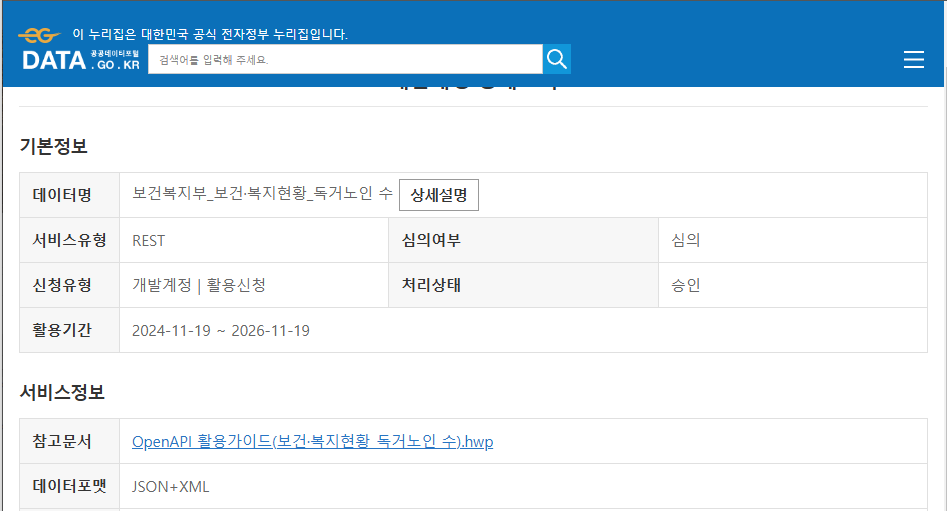
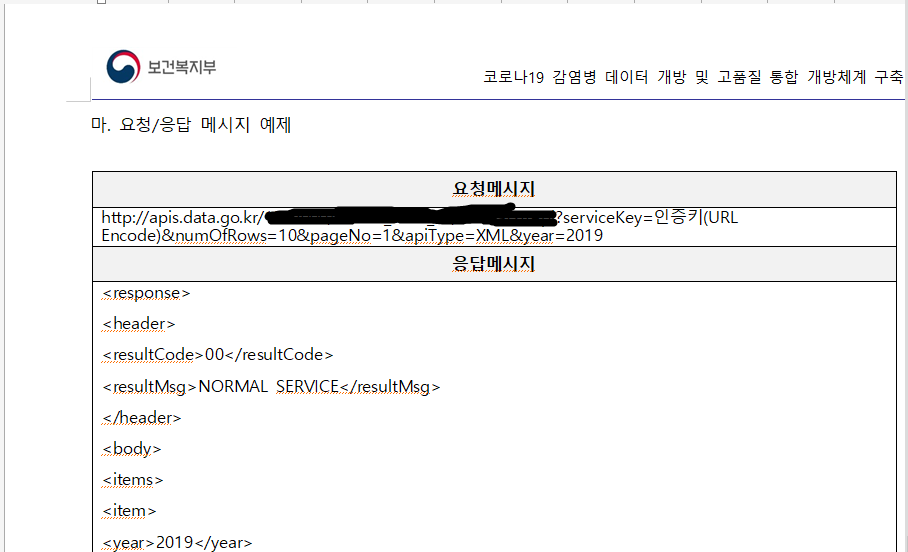

- 참고문서에 있는 한글 파일 다운로드
- 한글 파일에서 요청메시지 항목을 찾기
- 요청 메시지의 검정색 가려져 있는 부분이 엔드포인트 URL
- 요청 메시지의 인증키 뒷 부분(numOfRow=10, pageNo=1, apiType=XML, year=2019)가 params에 해당됨
- 서비스키는 해당 웹사이트 페이지에 일반인증키가 해당됨

In [114]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 디렉토리 존재 유무 확인 필수

- 새로운 XML 파일 생성

In [115]:
%%writefile /content/drive/MyDrive/data/elderly_person.xml
<?xml version="1.0" encoding="utf-8"?>
<body>
    <elderly>
    <serviceKey>qti9hzkkxlvaMjcYZ4mXJgiIjBBNk0K0zpniWtIKAHbrv5aE0WqKoSvrN2ZEd8GoLhGWgKAMKsP7wV6GbyazjQ%3D%3D</serviceKey>
    </elderly>
</body>


Overwriting /content/drive/MyDrive/data/elderly_person.xml


- 파일을 읽고 서비스 키를 추출한다

In [116]:
import bs4
with open("/content/drive/MyDrive/data/elderly_person.xml", 'r') as f:
    xml_doc = f.read()
elderly_person = bs4.BeautifulSoup(xml_doc, features="xml")
my_key = elderly_person.body.elderly.serviceKey.text


- 요청에 필요한 항목들을 정리한다 (항목들을 모두 연결하면 한글 파일의 요청메시지와 같아짐)

In [117]:
url = 'http://apis.data.go.kr/1352000/ODMS_STAT_24/callStat24Api?'
params ='&numOfRows=10&pageNo=1&apiType=XML&year=2019'
servicekey = f'&serviceKey={my_key}'
print(url+params+servicekey)


http://apis.data.go.kr/1352000/ODMS_STAT_24/callStat24Api?&numOfRows=10&pageNo=1&apiType=XML&year=2019&serviceKey=qti9hzkkxlvaMjcYZ4mXJgiIjBBNk0K0zpniWtIKAHbrv5aE0WqKoSvrN2ZEd8GoLhGWgKAMKsP7wV6GbyazjQ%3D%3D


- 한글 파일의 응답메시지를 참고하면 <item>에 필요한 정보들이 있는 것을 확인할 수 있다

In [118]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

result=urlopen(url+servicekey+params)
house=BeautifulSoup(result, 'lxml-xml')
items=house.find_all('item')

In [119]:
print(items) #출력으로 확인하며 응답메시지와 비교하면 같다는 것을 알 수 있다

[<item>
<year>2019</year>
<all>1500413</all>
<age65-69>379377</age65-69>
<age70-74>339066</age70-74>
<age75-79>348966</age75-79>
<age80-84>260141</age80-84>
<age85-89>126045</age85-89>
<age90u>46818</age90u>
</item>]


- 가져온 정보들을 csv 파일로 저장

In [120]:
# CSV 파일 저장
csv_file_path = '/content/drive/MyDrive/data/elderly_data.csv'

# CSV 파일 생성 및 데이터 저장
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # 헤더 작성
    header = ['year', 'all', 'age65-69', 'age70-74', 'age75-79', 'age80-84', 'age85-89', 'age90u']
    writer.writerow(header)

    # 데이터 추출 및 작성
    for item in items:
        row = [
            item.find('year').text if item.find('year') else '',
            item.find('all').text if item.find('all') else '',
            item.find('age65-69').text if item.find('age65-69') else '',
            item.find('age70-74').text if item.find('age70-74') else '',
            item.find('age75-79').text if item.find('age75-79') else '',
            item.find('age80-84').text if item.find('age80-84') else '',
            item.find('age85-89').text if item.find('age85-89') else '',
            item.find('age90u').text if item.find('age90u') else '',
        ]
        writer.writerow(row)

print(f"CSV 파일이 생성되었습니다: {csv_file_path}")

# 저장된 CSV 파일 읽기 및 출력
print("\nCSV 파일의 내용:")
with open(csv_file_path, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

CSV 파일이 생성되었습니다: /content/drive/MyDrive/data/elderly_data.csv

CSV 파일의 내용:
['year', 'all', 'age65-69', 'age70-74', 'age75-79', 'age80-84', 'age85-89', 'age90u']
['2019', '1500413', '379377', '339066', '348966', '260141', '126045', '46818']


### 3-2. JSON API 활용
- apiType만 바뀜

In [124]:
# JSON 데이터 생성 및 저장
elderly_person = {
    'elderly': {
        "serviceKey": "qti9hzkkxlvaMjcYZ4mXJgiIjBBNk0K0zpniWtIKAHbrv5aE0WqKoSvrN2ZEd8GoLhGWgKAMKsP7wV6GbyazjQ%3D%3D"
    }
}

json_file_path = "/content/drive/MyDrive/data/elderly.json"
with open(json_file_path, 'w') as f:
    json.dump(elderly_person, f)

print(f"JSON 파일이 생성되었습니다: {json_file_path}")

JSON 파일이 생성되었습니다: /content/drive/MyDrive/data/elderly.json


In [129]:
# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    data = json.load(f)

# 서비스 키 추출
service_key = data['elderly']['serviceKey']

# API 호출
url = 'http://apis.data.go.kr/1352000/ODMS_STAT_24/callStat24Api?'
params = '&numOfRows=10&pageNo=1&apiType=XML&year=2019'
servicekey = f'&serviceKey={service_key}'
result = urlopen(url + params + servicekey)


- 가져온 파일들을 json 형식으로 저장

In [130]:
house = BeautifulSoup(result, 'lxml-xml')
items = house.find_all('item')

# JSON 변환 및 저장
json_data = {"items": []}

for item in items:
    json_data["items"].append({
        "year": item.find('year').text if item.find('year') else '',
        "all": item.find('all').text if item.find('all') else '',
        "age65-69": item.find('age65-69').text if item.find('age65-69') else '',
        "age70-74": item.find('age70-74').text if item.find('age70-74') else '',
        "age75-79": item.find('age75-79').text if item.find('age75-79') else '',
        "age80-84": item.find('age80-84').text if item.find('age80-84') else '',
        "age85-89": item.find('age85-89').text if item.find('age85-89') else '',
        "age90u": item.find('age90u').text if item.find('age90u') else '',
    })

# JSON 파일 저장
json_output_file = "/content/drive/MyDrive/data/elderly_data.json"
with open(json_output_file, 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print(f"XML 응답 데이터를 JSON 형식으로 저장하였습니다: {json_output_file}")

# 저장된 JSON 데이터 출력
print("\n저장된 JSON 데이터:")
print(json.dumps(json_data, ensure_ascii=False, indent=4))

XML 응답 데이터를 JSON 형식으로 저장하였습니다: /content/drive/MyDrive/data/elderly_data.json

저장된 JSON 데이터:
{
    "items": [
        {
            "year": "2019",
            "all": "1500413",
            "age65-69": "379377",
            "age70-74": "339066",
            "age75-79": "348966",
            "age80-84": "260141",
            "age85-89": "126045",
            "age90u": "46818"
        }
    ]
}
